# The Data Behind  Presidental Charisma 

## Introduction 

Artificial Intelligence (AI) revolution is based in some ways on machines ability to understand and interact with humans, Natural language processing (NLP) is simply the part of AI that has to do with language. It is concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. A few examples of NLP applications include automatic summarization, topic segmentation, and sentiment analysis.

Text-based communication has become one of the most common forms of expression. Unstructured text data we produce daily has become extremely common, texts, emials, posts, tweets etc. Analyzing large quantities of text data is now a key way to understand what people are thinking. Presidential speeches provide an ideal text collection to detect patternes, quantify some charctarists and test and practice NLP, espcailly if you're very new to this. 

Charismatic qualities of leaders,emphsizes how these leaders communicate to thier followers and whether they are able to gain their trust, and influence and persuade them to follow.

In this analysis, I was set to find out if there is any correlation between Presidental Charisma and how well a given president performes in the office. Since a lot of people are pursated to vote for a certain preisdent based on their public appeal during public appearances such as speeches and debates. Is it a right call to vote for a president based on how 'charsmatic' they are? 



The data analysis behind answering this is structured as follows : 

- Gather all presidental speeches. 
- Identify what makes a speech charismatic and measure that charisma. 
- Rank presidental performance in office. 
- Check for any correlation between the two varibles
 


# Gathering Data : 

### - Web Scraping Speeches :

Scrapping content of all presidential speeches recorded in American history is essential in this analysis, with use of Selenium and BeautifulSoup libraries, the Miller Center orginization contains the transcprits of these speeches. The code below scrapes these transcripts into a dictionary with the name of the president and the corsponding speech. 

In [1]:
#packages for web scrapping 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
import time
from bs4 import BeautifulSoup
import requests 
import re

In [2]:
#browser to access the link of presidental speeches 
browser = webdriver.Chrome()
browser.get('https://millercenter.org/the-presidency/presidential-speeches')

In [3]:
# defining tag of speeches needed for scrapping 
elem = browser.find_element_by_tag_name('body')

In [4]:

# number of times browser should scroll to get to last speech 
no_of_pagedowns = 805

In [5]:
#while loop for scrolling 
while no_of_pagedowns: 
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    no_of_pagedowns-=1

In [6]:
#setting selector for speeches 
post_links = browser.find_elements_by_css_selector(".views-infinite-scroll-content-wrapper a")


In [7]:
#collecting links of each speech in list 
links = []
for link in post_links: 
    href = link.get_attribute('href')
    links.append(href)
   

In [8]:
#checking links, should be 985 link in total. 
len(links)

985

In [9]:
#get_speech function to collect speech + president's name 
def get_speeches(link):
    
    html_body = requests.get(link).content
    soup = BeautifulSoup(html_body,'html.parser')
    transcript = soup.select('.transcript-inner p')
    if len(transcript)<=0:
        transcript = soup.select('.view-transcript p')
    transcripts = [elem.get_text() for elem in transcript]
    transcripts=[re.sub("\((.*?)\)","",elem) for elem in transcripts]
    transcripts=[re.sub("(.*:)","",elem.strip()) for elem in transcripts]
    speech = ''.join(transcripts)
    president_name = soup.select('.president-name')[0]
    president_name = president_name.get_text()
    speech_dic = {'Name':president_name, 'Speech':speech}
    return speech_dic

In [10]:
presidental_speeches = list(map(get_speeches,links)) # loop through the extracted links and collect script 

In [11]:
Names = [d['Name'] for d in presidental_speeches] # extract presidents name list.
Speeches = [d['Speech'] for d in presidental_speeches] #extracg presidents speeches. 

# Measuring Charisma : 

Charisma is hard to measure, after a long research, I came to the conclusion that in modern times leaders who deploy emotions, frame their vision and paint pictures of that vision with use of stories and metaphors are precived as charsmatic. So Charasmatic speech contains in a nutshell three important traits : 

- Use of personal opinion, emotion, stories and metaphors

- Express sentiments, show confidence and deliever an positive message.

- Simplicity of language used to resonate with variety of people. 


In this analysis, to measure these three components, three different measures were used :  

- Ease of comprehension.

- The positivity and negativity of text.

- The subjectivity of text. 


Each of these components was measured using NLTK librabiers, TextBlob and Textstat. Readibilty measure, measures how easy the text is, in other words is it understandable? 

The polarity of a text referes to the overall message of the text, is it positive or negative? 

The subjectivity of a text is measured by calculating usage of personal opinion, emotion or stories in contrast to plain facts and numbers. 

## Readibilty of Speech : 

Flesch-Kincaid readability measures, developed by the United States Navy, are some of the popular measures. There are two metrics under this umbrella, namely, Flesch readability ease, and Flesch-Kincaid grade level. Flesch readability ease is used in this analysis provided by Textstat Library. 

- The Flesch reading ease measures a text difficulty based on two things : there are more words in a sentence on average, and the words are longer, or have more syllables. Where higher scores indicate material that is easier to read and understand; lower numbers mark passages that are more difficult to read. 

In [12]:
#packagaes for sentiment analysis and measuring text reading ease 
import nltk 
import pandas as pd
from textstat.textstat import textstat
import csv 
import numpy as np
from textblob import TextBlob

In [13]:
# returns the flesch reading ease score of a text 
def reading_ease(speech):
    if speech =='': 
        score = 0
    else: 
        score = textstat.flesch_reading_ease(speech)
       
        if score < 0: 
            score = 0   
            
    scores = {'flesch_reading_ease':score}
    
    return scores


In [14]:
flesch_reading_ease = list(map(reading_ease,Speeches))

In [15]:
flesch_reading_ease_scores = [d['flesch_reading_ease'] for d in flesch_reading_ease]

## Sentiment Analysis :

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

TextBlob library offers a lot of features like sentiment analysis, pos-tagging, noun phrase extraction, etc.  The sentiment function of textblob returns two properties, polarity, and subjectivity.

- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].  

In [16]:
# returns the sentiment, polarity and subjectivity of a text 
def sentiment(speech): 
    text = TextBlob(speech)
    subjectivity = text.sentiment.subjectivity
    polarity = text.sentiment.polarity
    sentiments = {'polarity':polarity, 'subjectivity':subjectivity}
    return sentiments

In [17]:
sentiment_analysis = list(map(sentiment,Speeches))

In [18]:
#testing 
sentiment_analysis[984]

{'polarity': 0.20871146130292473, 'subjectivity': 0.4405606588533418}

In [19]:
polarity = [d['polarity'] for d in sentiment_analysis]

In [20]:
subjectivity = [d['subjectivity'] for d in sentiment_analysis]

In [27]:
# Gather data into pandas dataframe for measurments 
df = pd.DataFrame({"President": Names,"flesch_reading_ease": flesch_reading_ease_scores,
                   "polarity": polarity, "subjectivity": subjectivity})

In [28]:
df.head()

,President,flesch_reading_ease,polarity,subjectivity
0,Donald Trump,71.85,0.129944,0.510395
1,Donald Trump,82.24,0.165819,0.525015
2,Donald Trump,62.72,0.049333,0.532011
3,Donald Trump,71.04,0.244721,0.543147
4,Donald Trump,50.60,0.113688,0.476655


In [29]:
#Standerizing all data by normilizing it between 0 and 1

from sklearn import preprocessing
%matplotlib inline

x = df[['flesch_reading_ease','polarity','subjectivity']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['flesch_reading_ease','polarity','subjectivity']] = pd.DataFrame(x_scaled)


In [31]:
df.head()

,President,flesch_reading_ease,polarity,subjectivity
0,Donald Trump,0.873662,0.501889,0.838636
1,Donald Trump,1.000000,0.584654,0.862659
2,Donald Trump,0.762646,0.315917,0.874153
3,Donald Trump,0.863813,0.766684,0.892451
4,Donald Trump,0.615272,0.464386,0.783198


# Quantifying Charisma : 
 
Charisma is defined as the mean of Flesch Reading Ease, Polarity and Subjectivity of each president throughout all of the collected speechs. 

In [32]:
df = df.groupby('President', as_index=False).mean()

In [37]:
df['charisma'] = df[['flesch_reading_ease','polarity','subjectivity']].mean(axis=1)
df.head()

,President,flesch_reading_ease,polarity,subjectivity,charisma
0,Abraham Lincoln,0.561868,0.513128,0.756348,0.610448
1,Andrew Jackson,0.227280,0.450367,0.717766,0.465138
2,Andrew Johnson,0.376353,0.365374,0.687275,0.476334
3,Barack Obama,0.156021,0.508494,0.741195,0.468570
4,Benjamin Harrison,0.476596,0.505209,0.773919,0.585241


In [38]:
df = df.groupby('President', as_index=True).mean()

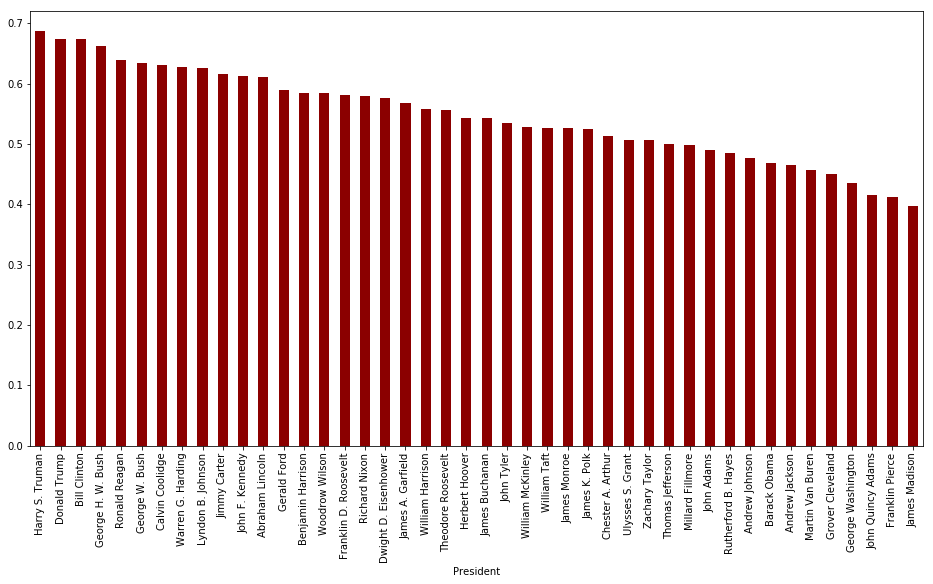

In [39]:
# president sorted by charisma 
df_csorted = df.sort_values('charisma',ascending=False) 
df_csorted['charisma'].plot(kind='bar',color='DarkRed',figsize=(16,8));

From the graph of Fletch reading ease, Trump has the highest reading ease since Truman, which is around fifth grade level, very easy to read. This translates to being easily understood by an average 11-year-old student, the simplist since Harry Truman, who speaks at nearly a sixth-grade level. 

We can see also that most presidents from 40 years ago have average around 7th grade level, fairly easy to read english.
expect Jimmy Carter who speaks at level of 8th to 9th grade. 

Speaking to a large audience means speaking in ways we can all understand and knowing what language will resonate with a certain crowd could get you far. We can also notice the simplification of langauage across the years, since it went from being at College level, difficult to read to being easily understood by high school students or in today's politics understood by fifth graders. 

It should be taken into account that the charisma measure will depend on the fletch reading ease, meaning scoring high on this reading ease will translate to being more charsmatic. 

# Performance Measure : Presidental Historian Surveys 

The presidental historian surveys ranks presidents based on different factors, C-SPAN's academic advisors devised a survey in which participants used a one ("not effective") to ten ("very effective") scale to rate each president on ten qualities of presidential leadership: 

- Public Persuasion 
- Crisis Leadership
- Economic Management
- Moral Authority
- International Relations
- Administrative Skills
- Relations with Congress
- Vision/Setting An Agenda
- Pursued Equal Justice for All
- Performance Within the Context of His Times 

The link to the survey can be found in resources below. However, Donlad Trump is excluded from this ranking, even though he has the highest 'charisma' because it ranks completed time at the office. That would result in his exclusion from the final results.  

In [183]:
url_rank = 'https://www.c-span.org/presidentsurvey2017/?page=overall'
r = requests.get(url_rank).text
soup = BeautifulSoup(r,'lxml')
table = soup.find('table')
A=[]
B=[]

for row in table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==5: #Only extract date column with no heading
            A.append(cells[0].find(text=True)) #president name 
            B.append(cells[1].find(text=True)) # ranking 
    

In [184]:
#fixing name variations in the list 
A[23] ='William Taft'
A[15]='William McKinley'
A[9]= 'Lyndon B. Johnson'
A[24]='Gerald Ford'
A[37]= 'William Harrison'
A[27]= 'Richard Nixon'

In [185]:
df_ranks = pd.DataFrame({"President": A, 'rank':B})
df_ranks.head()

,President,rank
0,Abraham Lincoln,906
1,George Washington,867
2,Franklin D. Roosevelt,854
3,Theodore Roosevelt,807
4,Dwight D. Eisenhower,744


In [186]:
#Normalzing ranks 
x = df_ranks[['rank']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_ranks[['rank']] = pd.DataFrame(x_scaled)


In [187]:
df = pd.merge(df,df_ranks,on='President')
df.head()

,President,flesch_reading_ease,polarity,subjectivity,charisma,rank
0,Abraham Lincoln,0.650583,0.513128,0.756348,0.640020,1.000000
1,Andrew Jackson,0.322512,0.450367,0.717766,0.496882,0.550681
2,Andrew Johnson,0.372695,0.365374,0.687275,0.475115,0.045386
3,Barack Obama,0.764530,0.508494,0.741195,0.671406,0.639939
4,Benjamin Harrison,0.496906,0.505209,0.773919,0.592011,0.326778


In [188]:
df = df.set_index('President')

In [189]:
# final dataframe 
df.head()

,flesch_reading_ease,polarity,subjectivity,charisma,rank
President,,,,,
Abraham Lincoln,0.650583,0.513128,0.756348,0.640020,1.000000
Andrew Jackson,0.322512,0.450367,0.717766,0.496882,0.550681
Andrew Johnson,0.372695,0.365374,0.687275,0.475115,0.045386
Barack Obama,0.764530,0.508494,0.741195,0.671406,0.639939
Benjamin Harrison,0.496906,0.505209,0.773919,0.592011,0.326778


# Analysis and Results :

In this part, the dataframe has been ordered by ranking to clearly observe any relationship between charisma and ranking score of each president. 

In [190]:
df_rsorted = df.sort_values('rank',ascending=False) #sort values by ranking 

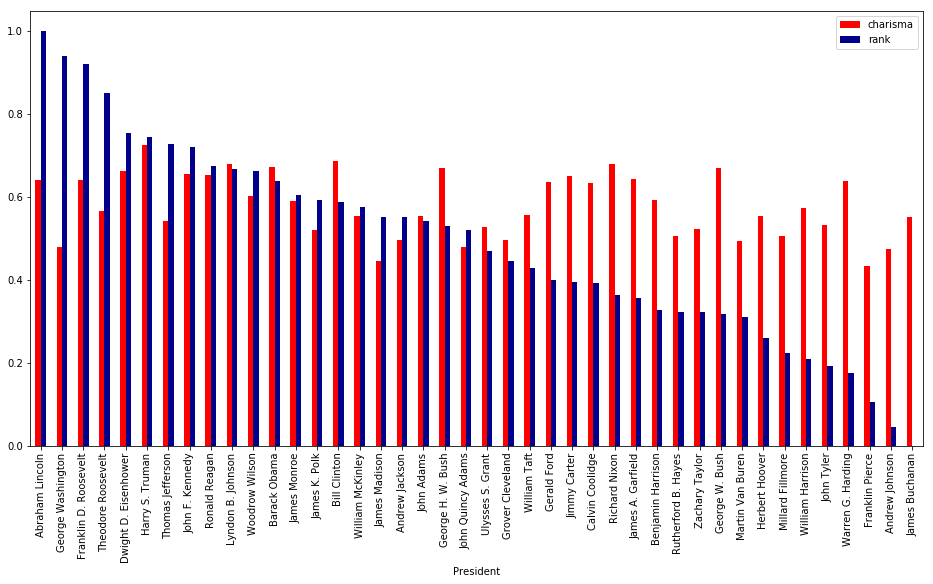

In [193]:
df_rsorted[['charisma','rank']].plot(kind='bar',color=('r','DarkBlue','g'),figsize=(16,8));

From this plot, presidents who performed good had good charisma but also those who've underperfromed had high charisma scores too. 

The time of presidentcy has an effect on charisma becasue of Fletch reading ease measure, langauge has developed throughout time, making what was preseved as charsmatic, complexity of speech to reflect a person's education for example vs. simplicity of speech nowdays, reflecting the high gcharisma of modern presidents like Obama, Regan, Clinton and so on. 

To further investigate  the prospect of any relationship between the two varibles, correlation function will be used alongside a scatterplot.

# Correlation Between Charisma and Ranking : 


The term "correlation" refers to a mutual relationship or association between quantities. 

With use of pandas corr() function, the prospect of a relationship between ranking and charisma is explored. 
The figure below shows scatter plot of the Pearson correlation. Note that the two varibles are independent, where correlation between them is equal to $0.3148$, signifying a slight positive correlation between the two varibles. However, assuming any kind of relationship will need more comprehensive way of measuring charisma, but for now we can conclude there is no relationship between the two. 




0.3166294242726129


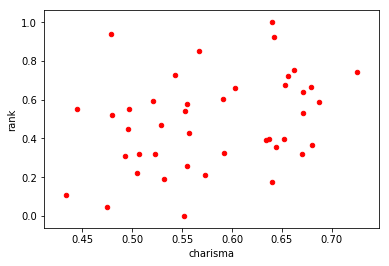

In [192]:
corr = df['charisma'].corr(df['rank'])
print(corr)
df.plot.scatter(x='charisma', y='rank', c='r');

In general, people will vote for the leader who embodies their party’s values. However, Charismatic leaders appeal to the emotions of the audience. If people are undecided, voting for a candidate is no longer about policy or experience, it will come down to charisma. People will tend to vote for the more charismatic. But what reallu accounts for all this superficial reasoning? 


The concept of 'charisma' was introduced in the study of politics and society by Max Weber, who borrowed it from the realm of religion. 

Weber defined charisma as :


 "A certain quality of an individual personality by virtue of which he is considered extraordinary and treated as endowed with supernatural, superhuman, or at least specifically exceptional powers or qualities. These are such as are not accessible to the ordinary person, but are regarded as of divine origin or as exemplary, and on the basis of them the individual concerned is treated as a ‘leader' ".


Charsmatic leaders are often associated with knowing what is best, outperforming in certian aspects, saviors of the day, but really all that charisma does is enable you to influence people. As far as actually being effective, it doesn't make you better at making good decisions that will steer a country in the right direction.

This brings us to conclude that no matter how charming a president or a candidate for presidency is during times of elections, debates or speeches, it doesn't say anything about how good they'll perform later on if they're elected. There's nothing about being a charismatic president that makes them more effective as a problem solver. 
~
 

In [195]:
df.to_csv('The-Data-Behind-Presidental-Charisma.csv')

In [ ]:
url_rank = 'https://www.c-span.org/presidentsurvey2017/?page=overall'
r = requests.get(url_rank).text
soup = BeautifulSoup(r,'lxml')
table = soup.find('table')
A=[]
B=[]

for row in table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==5: #Only extract date column with no heading
            A.append(cells[0].find(text=True)) #president name 
            B.append(cells[1].find(text=True)) # ranking 

# References 
#### Flesch Readibilty Ease 

https://datawarrior.wordpress.com/2016/03/29/flesch-kincaid-readability-measure/

https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

#### Excutive Orders
https://www.history.com/topics/executive-order

https://www.cnbc.com/2014/01/28/executive-orders-what-they-are-and-how-they-work.html

#### Presidental Historian Surveys 

https://www.c-span.org/presidentsurvey2017/?page=overall


#### What Voters Want 
https://www.nytimes.com/2016/01/26/opinion/campaign-stops/what-voters-want.html 


#### Voting for a candidate is not about policy or experience -- it's about charisma, researchers find

http://news.cornell.edu/stories/2008/10/voters-make-snap-judgments-based-candidates-charisma

#### Voting Behavior

https://www.icpsr.umich.edu/icpsrweb/instructors/setups/voting.jsp